<a href="https://colab.research.google.com/github/Alex-Sensintaffar/CS5783/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

Question 1

1) 

To find the conditional probability I first divided the local price into 3 seprate catigories (lp < 5; 5 <= lp < 6; 6 < lp). Next I took any features that could be interpreted as discrete data and created a table. I show my steps for finding the bathroom in the hand calculations document. I was left with 3 features that had to be interpreted as continious. I found the mean and standard deviation of the three features from the training data for each of the three different target classes. 

The computed values [Question1_1 computed values](https://docs.google.com/spreadsheets/d/1_ClUYbFZ16MmpaLKOLiMAwnpqve0IEtP/edit?usp=sharing&ouid=113251020784984933363&rtpof=true&sd=true)
and the hand calculations [Hand Calculations](https://drive.google.com/file/d/1_Z_C1_zsj1tCm4RkIRSFgO3skDuuVlHs/view?usp=sharing) are both stored in seprate files.

2)

In [5]:
dataframe = pd.ExcelFile('/content/drive/MyDrive/Asssignment4_Data.xlsx')
df_train = pd.read_excel(dataframe, "Train")
df_test = pd.read_excel(dataframe, "Test")

In [6]:
def gaussian(x, mean, std):
    value1 = 1/(np.sqrt(2*np.pi)*std)
    value2 = np.exp(-(x-mean)**2/(2*std**2))
    return value1 * value2


In [7]:
BATHROOM = [[4/4, 0/4, 0/4], [9/9, 0/9, 0/9], [2/7, 3/7, 2/7]]
LAND_AREA = [[3.563, 0.948693488], [6.21836667, 2.1069364], [7.867714286, 2.660902461]]
LIVING_AREA = [[1.09825, 0.12380731], [1.309, 0.204720541], [1.917571429, 0.915958488]]
GARAGES = [[0/4, 4/4, 0/4, 0/4], [3/9, 3/9, 0/9, 3/9], [0/7, 2/7, 2/7, 3/7]]
ROOMS = [[0/4, 3/4, 1/4, 0/4], [1/9, 6/9, 2/9, 0/9], [1/7, 1/7, 2/7, 3/7]]
BEDROOMS = [[0/4, 4/4, 0/4, 0/4], [1/9, 7/9, 1/9, 0/9], [1/7, 3/7, 1/7, 2/7]]
AGE_OF_HOUSE = [[48, 8.164965809], [39.88888889, 11.18530782], [28.28571429, 13.30055495]]
CONSTRUCTION = [[2/4, 2/4, 0/4], [2/9, 2/9, 5/9], [2/7, 3/7, 2/7]]

P_LESS_5 = 4/20
P_GREAT_5_LESS_10 = 9/20
P_GREAT_10 = 7/20
P_LIST = [P_LESS_5, P_GREAT_5_LESS_10, P_GREAT_10]


In [9]:
# MAP
productList = []
for i in range(len(df_test)):
    productSubList = []
    product = 1

    for localPrice in range(3):
        
        product = 1
        for j in range(len(df_test.iloc[i])):
            if j == 2:
                if df_test.iloc[i][j] == 1:
                    product *= BATHROOM[localPrice][0]
                elif df_test.iloc[i][j] == 1.5:
                    product *= BATHROOM[localPrice][1]
                elif df_test.iloc[i][j] == 2.5:
                    product *= BATHROOM[localPrice][2]
                else:
                    print(i, localPrice, j)
            if j == 3:
                mean = LAND_AREA[localPrice][0]
                std = LAND_AREA[localPrice][1]
                product *= gaussian(df_test.iloc[i][j], mean, std)
            if j == 4:
                mean = LIVING_AREA[localPrice][0]
                std = LIVING_AREA[localPrice][1]
                product *= gaussian(df_test.iloc[i][j], mean, std)
            if j == 5:
                if df_test.iloc[i][j] == 0:
                    product *= GARAGES[localPrice][0]
                elif df_test.iloc[i][j] == 1:
                    product *= GARAGES[localPrice][1]
                elif df_test.iloc[i][j] == 1.5:
                    product *= GARAGES[localPrice][2]
                elif df_test.iloc[i][j] == 2:
                    product *= GARAGES[localPrice][3]
                else:
                    print(i, localPrice, j, df_test.iloc[i][j])
            if j == 6:
                if df_test.iloc[i][j] == 5:
                    product *= ROOMS[localPrice][0]
                elif df_test.iloc[i][j] == 6:
                    product *= ROOMS[localPrice][1]
                elif df_test.iloc[i][j] == 7:
                    product *= ROOMS[localPrice][2]
                elif df_test.iloc[i][j] >= 8:
                    product *= ROOMS[localPrice][3]
                else:
                    print(i, localPrice, j)
            if j == 7:
                if df_test.iloc[i][j] == 2:
                    product *= BEDROOMS[localPrice][0]
                elif df_test.iloc[i][j] == 3:
                    product *= BEDROOMS[localPrice][1]
                elif df_test.iloc[i][j] == 4:
                    product *= BEDROOMS[localPrice][2]
                elif df_test.iloc[i][j] == 5:
                    product *= BEDROOMS[localPrice][3]
                else:
                    print(i, localPrice, j)
            if j == 8:
                mean = AGE_OF_HOUSE[localPrice][0]
                std = AGE_OF_HOUSE[localPrice][1]
                product *= gaussian(df_test.iloc[i][j], mean, std)
            if j == 9:
                if df_test.iloc[i][j] == "Condo":
                    product *= CONSTRUCTION[localPrice][0]
                elif df_test.iloc[i][j] == "Apartment":
                    product *= CONSTRUCTION[localPrice][1]
                elif df_test.iloc[i][j] == "House":
                    product *= CONSTRUCTION[localPrice][2]
                else:
                    print(i, localPrice, j)
        product *= P_LIST[localPrice]      
        productSubList.append(product)
    productList.append(productSubList)


In [10]:
# Print Accuracy
for i in range(len(productList)):
    tempString = str(df_test.iloc[i][0]) + ": "
    for j in range(len(productList[i])):
        prefix = ""
        if j == 0:
            prefix = "x < 5 "
        if j == 1:
            prefix = "\t |  5 <= x < 6 "
        if j == 2:
            prefix = "\t |  6 < x "

        tempString += prefix + str(round(productList[i][j], 8)* 100) + "%"
    print(tempString)


24: x < 5 0.0%	 |  5 <= x < 6 0.0%	 |  6 < x 9.599999999999999e-05%
25: x < 5 0.0%	 |  5 <= x < 6 0.0%	 |  6 < x 6.500000000000001e-05%
26: x < 5 0.0%	 |  5 <= x < 6 3.7e-05%	 |  6 < x 4.3e-05%
27: x < 5 0.0%	 |  5 <= x < 6 0.0%	 |  6 < x 0.00020999999999999998%
28: x < 5 0.0%	 |  5 <= x < 6 0.0%	 |  6 < x 0.000135%


In [11]:
# Test
LocalPriceRange = ["Local Price is Less Than 5", "Local Price is Greater Than 5 and Less Than 6", "Local Price is Greater Than 6"]
count = 0
for i in range(len(df_test)):
    max = -1
    maxIndex = -1
    for j in range(len(productList[0])):
        if productList[i][j] > max:
            max = productList[i][j]
            maxIndex = j
    predicted = LocalPriceRange[maxIndex]
    actualIndex = -1
    temp = df_test.iloc[i][1]
    if temp < 5:
        actualIndex = 0
    elif 5 <= temp < 6:
        actualIndex = 1
    elif 6 <= temp:
        actualIndex = 2

    if actualIndex == maxIndex:
        print("House ID", df_test.iloc[i][0], "was correctly predicted")
        count += 1
    else:
        print("House ID", df_test.iloc[i][0], "was incorrectly predicted")

print("Accuracy:", str(count/len(df_test)*100) + "%")


House ID 24 was correctly predicted
House ID 25 was correctly predicted
House ID 26 was correctly predicted
House ID 27 was correctly predicted
House ID 28 was correctly predicted
Accuracy: 100.0%


Question 2)

In [12]:
def classGroups(yList):
    output = []
    for i in yList:
        if i < 5:
            output.append("x < 5")
        elif 5 <= i < 6:
            output.append("5 <= x < 6")
        elif 6 <= i:
            output.append("6 <= x")
    return output

In [18]:
dataframe = pd.ExcelFile('/content/drive/MyDrive/Asssignment4_Data.xlsx')
df_train = pd.read_excel(dataframe, "Train")
df_test = pd.read_excel(dataframe, "Test")


In [19]:
xList = []
yList = []

for i in range(len(df_train)):
    tempXList = []
    for j in range(2, len(df_train.iloc[i])-1):
        if j == 9:
            subList = []
            if df_train.iloc[i][j] == "Apartment":
                subList = [1, 0, 0]
            elif df_train.iloc[i][j] == "House":
                subList = [0, 1, 0]
            elif df_train.iloc[i][j] == "Condo":
                subList = [0, 0, 1]
            tempXList += subList
        else:
            tempXList.append(df_train.iloc[i][j])
    

    xList.append(tempXList)
    yList.append(df_train.iloc[i][1])


In [20]:
xTestList = []
yTestList = []

for i in range(len(df_test)):
    tempTestList = []
    for j in range(2, len(df_test.iloc[i])-1):
        if j == 9:
            subList = []
            if df_test.iloc[i][j] == "Apartment":
                subList = [1, 0, 0]
            elif df_test.iloc[i][j] == "House":
                subList = [0, 1, 0]
            elif df_test.iloc[i][j] == "Condo":
                subList = [0, 0, 1]
            tempTestList += subList
        else:
            tempTestList.append(df_test.iloc[i][j])

    xTestList.append(tempTestList)
    yTestList.append(df_test.iloc[i][1])


In [22]:
clf = tree.DecisionTreeClassifier()

lab = preprocessing.LabelEncoder()
lab.fit(yList)
y_transformed = lab.transform(yList)

clf = clf.fit(xList, y_transformed)
y_pred = clf.predict(xTestList)
y_pred_train = clf.predict(xList)

lab = preprocessing.LabelEncoder()
lab.fit(yTestList)
y_test_transform = lab.transform(yTestList)

accuracy = metrics.accuracy_score(y_test_transform, y_pred)
accuracy2 = metrics.accuracy_score(y_transformed, y_pred_train)

y_pred_transform = []
for i in range(len(y_pred)):
    for j in range(len(y_transformed)):
        if y_pred[i] == y_transformed[j]:
            y_pred_transform.append(yList[j])

y_pred_groups = classGroups(y_pred_transform)
y_test_groups = classGroups(yTestList)

trueAccuracy = 0
for i in range(len(y_pred_groups)):
    if y_pred_groups[i] == y_test_groups[i]:
        trueAccuracy += 1
print("Test Accuracy:", str(trueAccuracy/len(y_pred_groups)*100) + "%")
print("Train Accuracy:", str(accuracy2*100) + "%")


Test Accuracy: 60.0%
Train Accuracy: 100.0%


1)

a) The accuracy on the training set is 100%

b) The accuracy on the testing set is 60% 

2)

The accuracy decreases as the maximum depth of the tree is decreased.Having a maximum depth of 7 or more will have the best accuracy for the training set.

3)

Restricting the depth of the tree reduces preformance because the number of features being used to seperate the data is decreased.

4) Hand tracing is done [here](https://drive.google.com/file/d/1ksMt7ajHdt7CfkCs-D4G4Dq3K-H7ggkc/view?usp=sharing) and the figure used is [here](https://drive.google.com/file/d/1L2y_fORjA9dJr7Z5jOFlwgm3uYIhOeVu/view?usp=sharing)



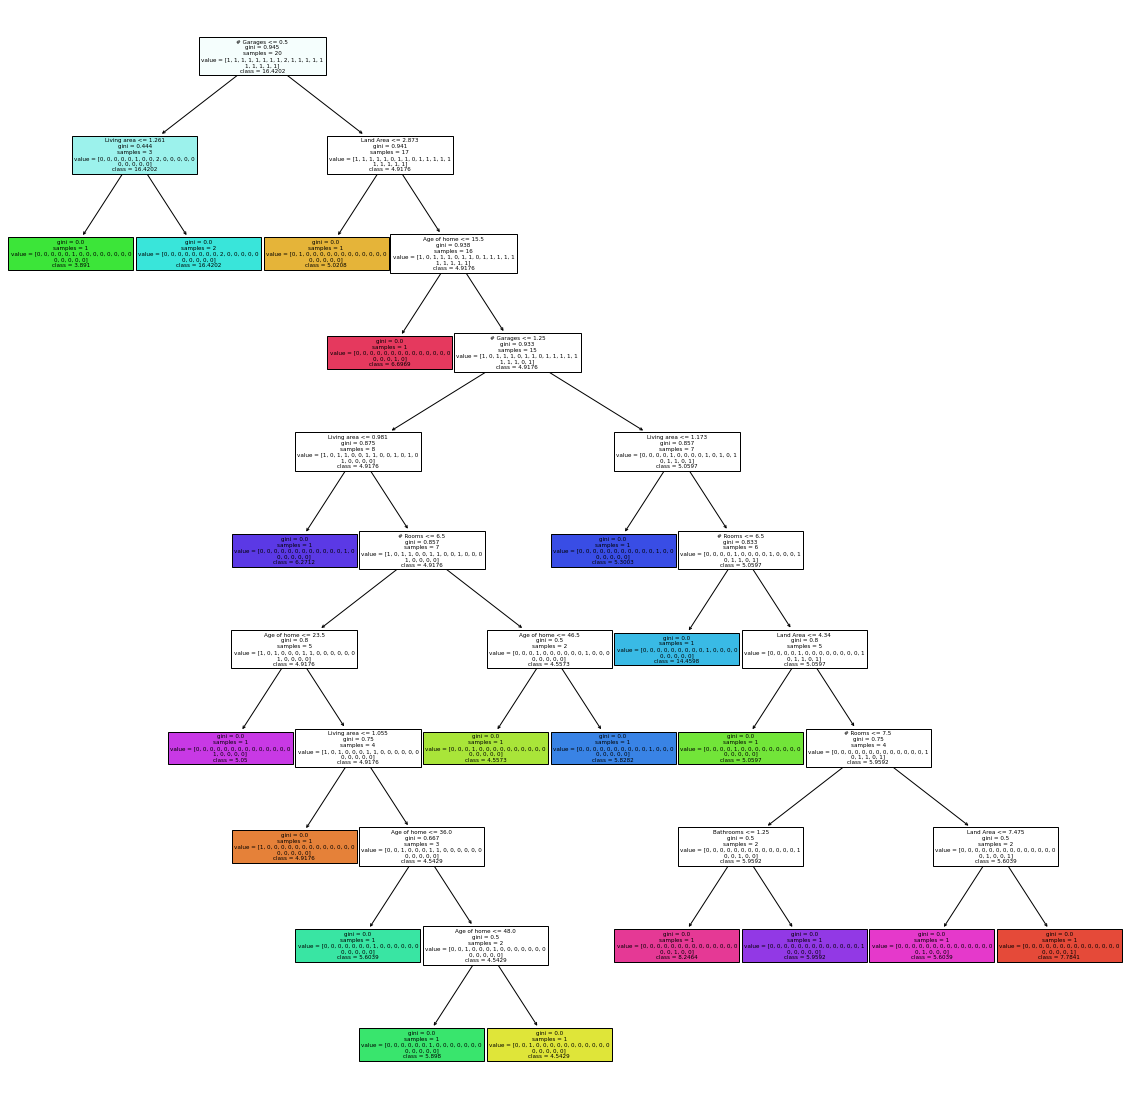

In [23]:
labels = []
for col in df_train.columns:
    labels.append(col)
labels = labels[2:9] + ["Apartment", "House", "Condo"]

classNames = []
for i in range(len(df_train)):
    classNames.append(str(df_train.iloc[i][1]))

# print(labels)
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf,
            feature_names=labels,
            class_names=classNames,
            filled=True)
plt.show()

Question 3)

In [25]:
dataframe = pd.ExcelFile('/content/drive/MyDrive/Asssignment4_Data.xlsx')
df_train = pd.read_excel(dataframe, "Train")
df_test = pd.read_excel(dataframe, "Test")

In [26]:
xTrainList = []
yTrainList = []

xTestList = []
yTestList = []

for i in range(len(df_train)):
    tempXTrainList = []
    for j in range(2, len(df_train.iloc[i])-1):
        tempXTrainList.append(df_train.iloc[i][j])
    xTrainList.append(tempXTrainList)

    if df_train.iloc[i][1] < 5:
        yTrainList.append(0)
    elif 5 <= df_train.iloc[i][1] < 6:
        yTrainList.append(1)
    elif 6 <= df_train.iloc[i][1]:
        yTrainList.append(2)

for i in range(len(df_test)):
    tempXTestList = []
    for j in range(2, len(df_test.iloc[i])-1):
        tempXTestList.append(df_test.iloc[i][j])
    xTestList.append(tempXTestList)
    if df_test.iloc[i][1] < 5:
        yTestList.append(0)
    elif 5 <= df_test.iloc[i][1] < 6:
        yTestList.append(1)
    elif 6 <= df_test.iloc[i][1]:
        yTestList.append(2)


In [27]:
def distance(point_1, point_2):
    sum = 0
    for i in range(len(point_1)):
        sum += (point_1[i] - point_2[i])**2
    
    return sum**.5


In [28]:
def kNN(k, testPoint):
    dist = dict()
    for i in range(len(xTrainList)):
        dist[i] = distance(xTrainList[i], testPoint)
    
    kList = [-1] * k
    kCount = 0
    for key, value in dist.items():
        if kCount < k:
            kList[kCount] = key
            kCount += 1
        else:
            max = 0
            maxIndex = -1
            for i in range(len(kList)):
                if dist[kList[i]] > value:
                    if dist[kList[i]] > max:
                        max = dist[kList[i]]
                        maxIndex = i
            if maxIndex != -1:
                kList[maxIndex] = key
    return kList


In [29]:
accuracyList = []
for k in range(1, 6):
    accuracy = 0
    for j in range(len(xTestList)):
        kList = kNN(k, xTestList[j])

        count = [0] * 3
        for i in range(len(kList)):
            temp = yTrainList[kList[i]]
            count[temp] += 1

        max = 0
        maxIndex = 0
        for i in range(len(count)):
            if count[i] >= max:
                max = count[i]
                maxIndex = i
        if maxIndex == yTestList[j]:
            accuracy += 1
    print("Accuracy:", str(accuracy/len(xTestList)*100)+"%", "k:", k)
    accuracyList.append((accuracy/len(xTestList))*100)


Accuracy: 40.0% k: 1
Accuracy: 60.0% k: 2
Accuracy: 20.0% k: 3
Accuracy: 40.0% k: 4
Accuracy: 20.0% k: 5


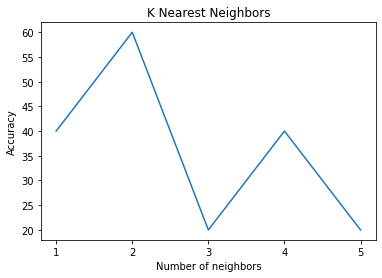

In [30]:
plt.plot([1, 2, 3, 4, 5], accuracyList)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K Nearest Neighbors")
plt.xticks(range(1, 6))
plt.show()